In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=4)
MDP of size 49 / 4 / 165 / 3.4

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=4, maximum_size=0, force_consider_own=True)
MDP of size 888 / 3 / 3327 / 3.7


,alpha,gamma,horizon,value_eps,model,vi_iter,vi_time,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time
0,0.25,0.5,100,0.01,their,549,0.052528,4,4,0.001038,0.250000,2,0.003150
1,0.25,0.5,100,0.01,our,644,1.006850,10,10,0.000683,0.250000,2,0.004150
2,0.40,0.5,50,0.01,their,326,0.032090,25,25,0.000749,0.471058,2,0.009393
3,0.40,0.5,50,0.01,our,353,0.550341,65,65,0.000979,0.438340,2,0.024149
4,0.30,0.5,50,0.01,their,286,0.028028,17,17,0.000855,0.317624,2,0.006396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.30,0.0,200,0.01,our,1360,2.189295,10,10,0.000759,0.300000,2,0.004189
176,0.05,0.5,200,0.01,their,625,0.061586,4,4,0.000457,0.050000,2,0.001778
177,0.05,0.5,200,0.01,our,646,1.036080,10,10,0.000633,0.050000,2,0.004037
178,0.40,1.0,50,0.01,their,381,0.037972,17,17,0.000518,0.599089,2,0.006612


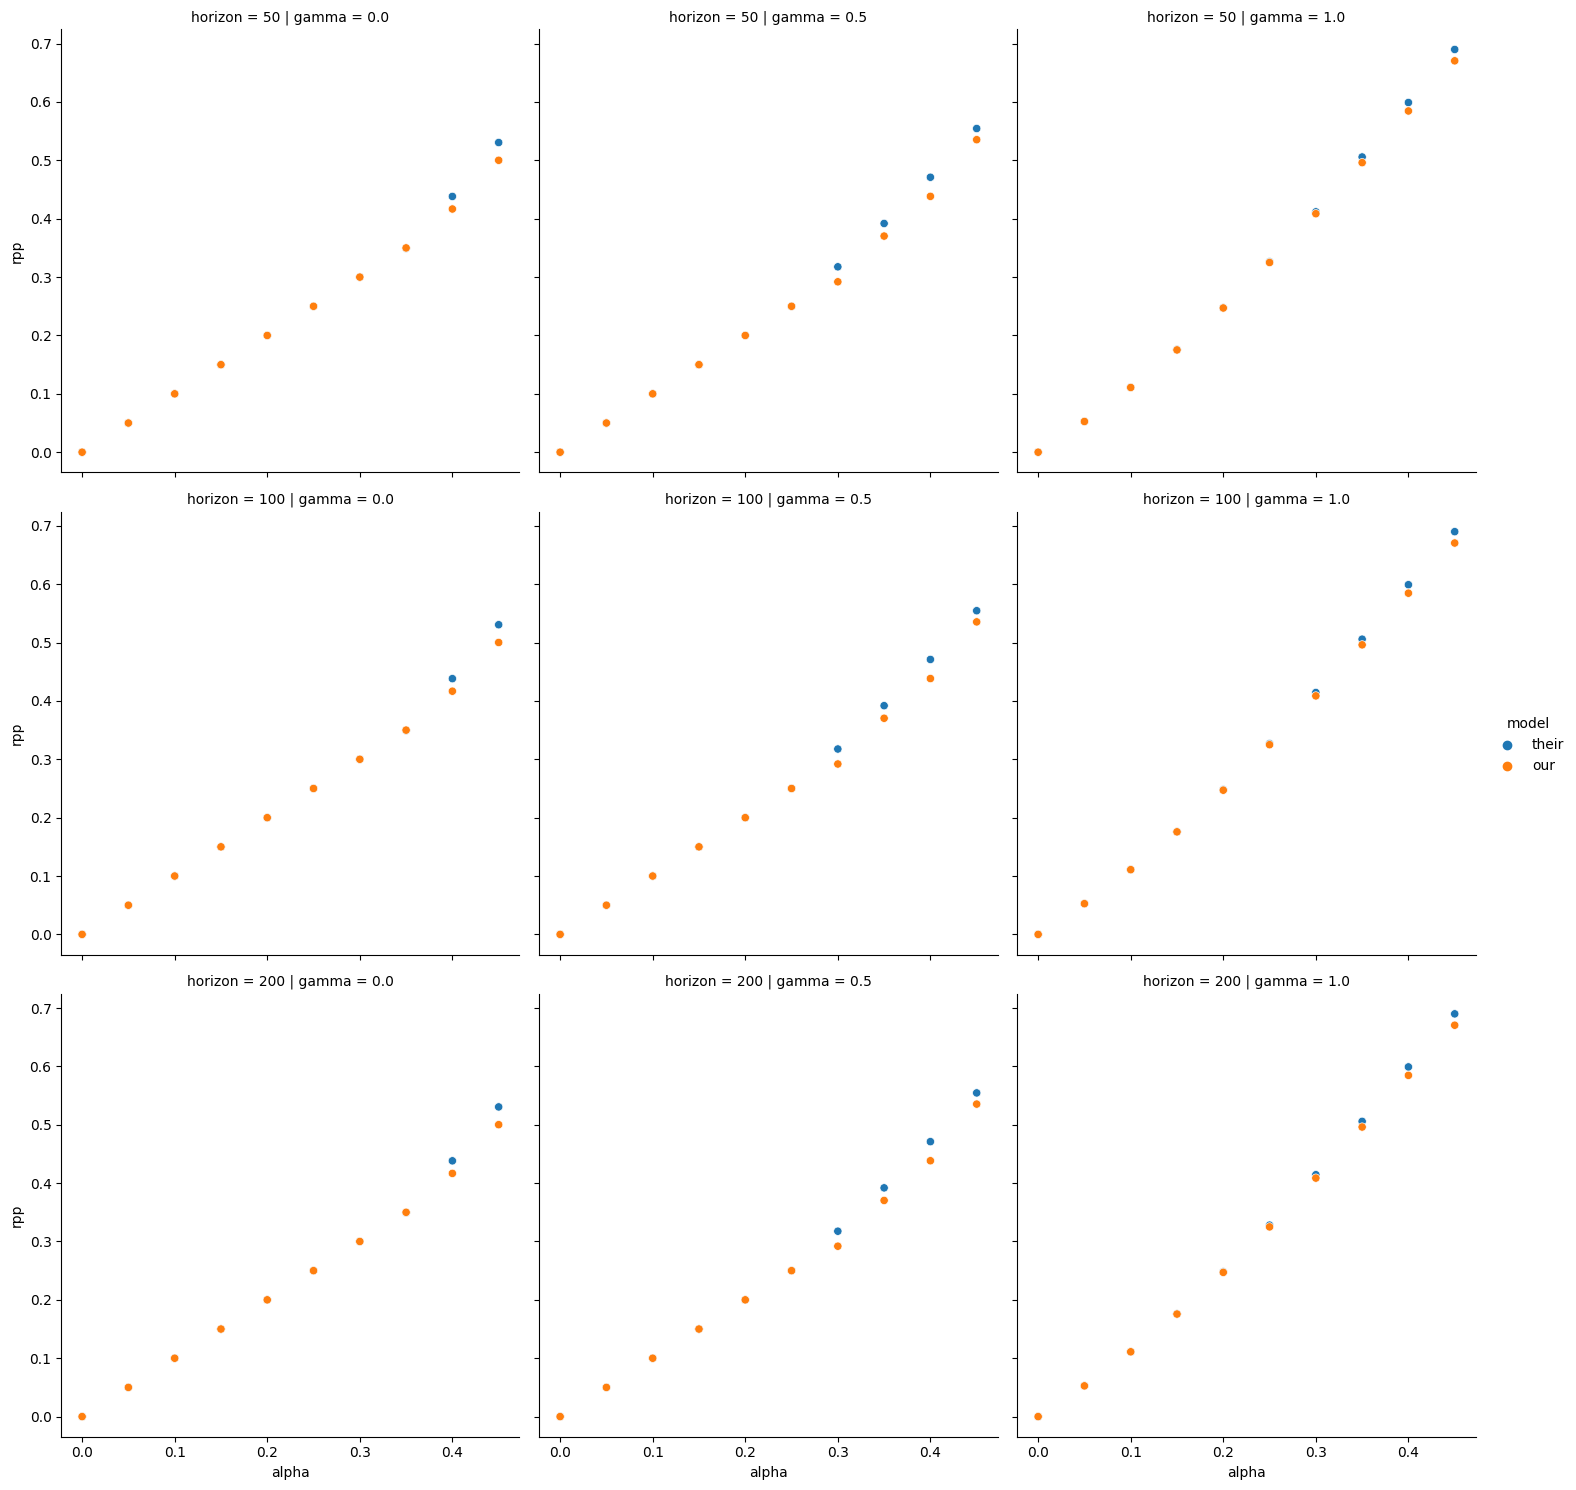

In [3]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="model",
)

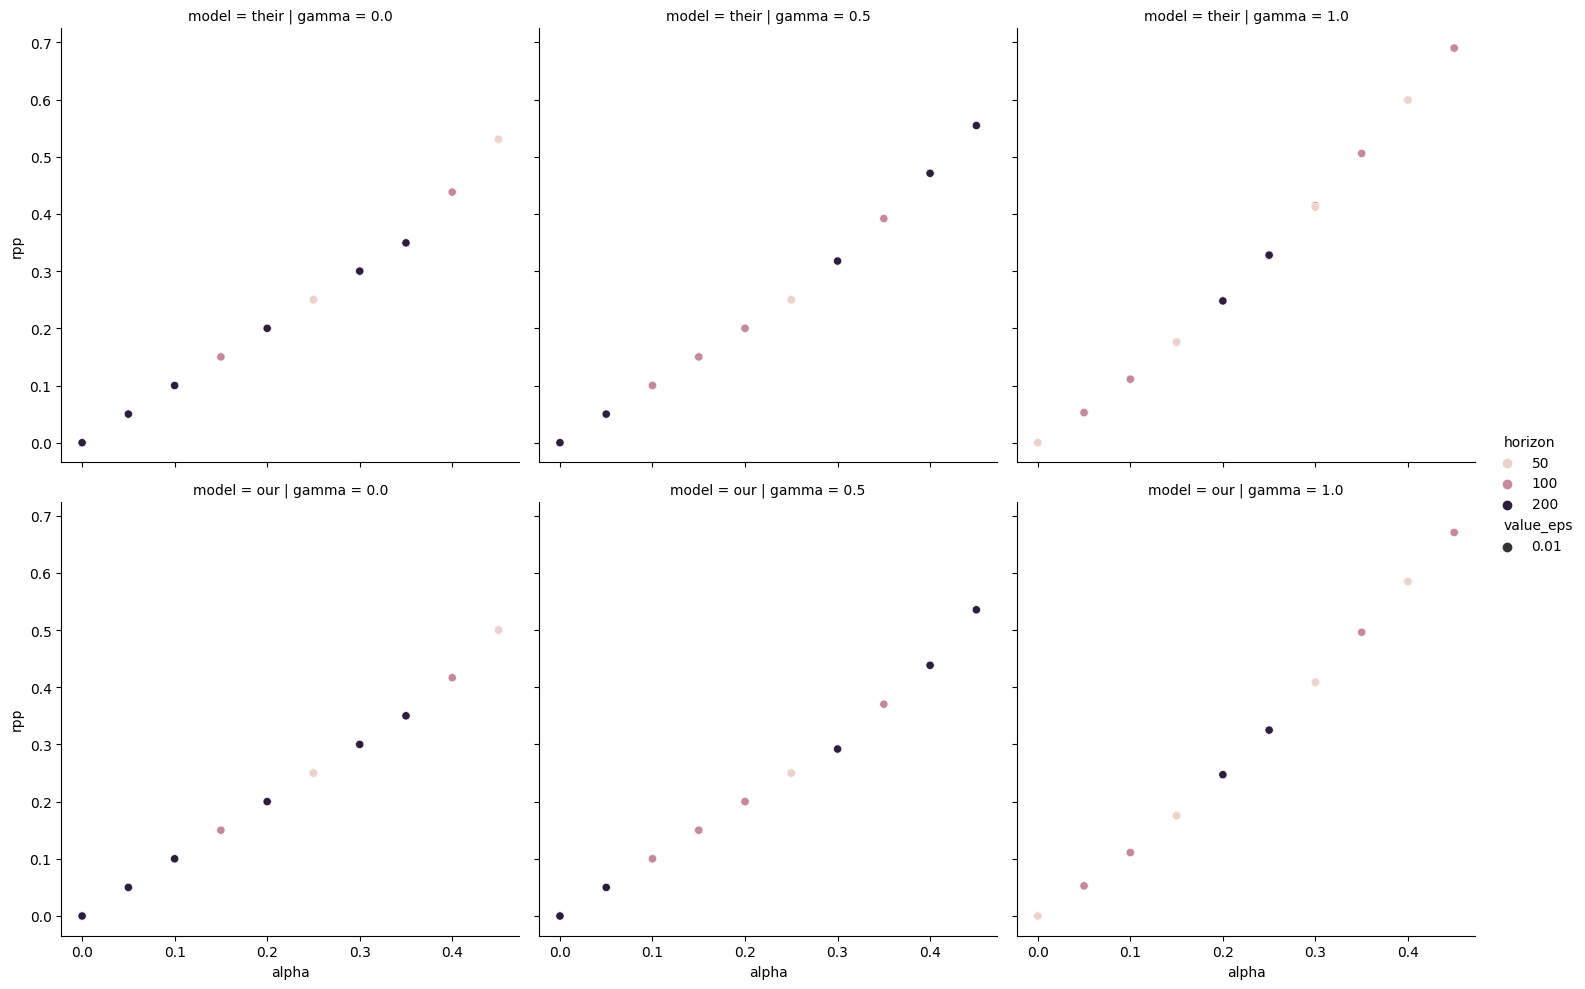

In [4]:
# Demonstrate effect of horizon
sns.relplot(
    data,
    x="alpha",
    y="rpp",
    col="gamma",
    row="model",
    hue="horizon",
    style="value_eps",
)

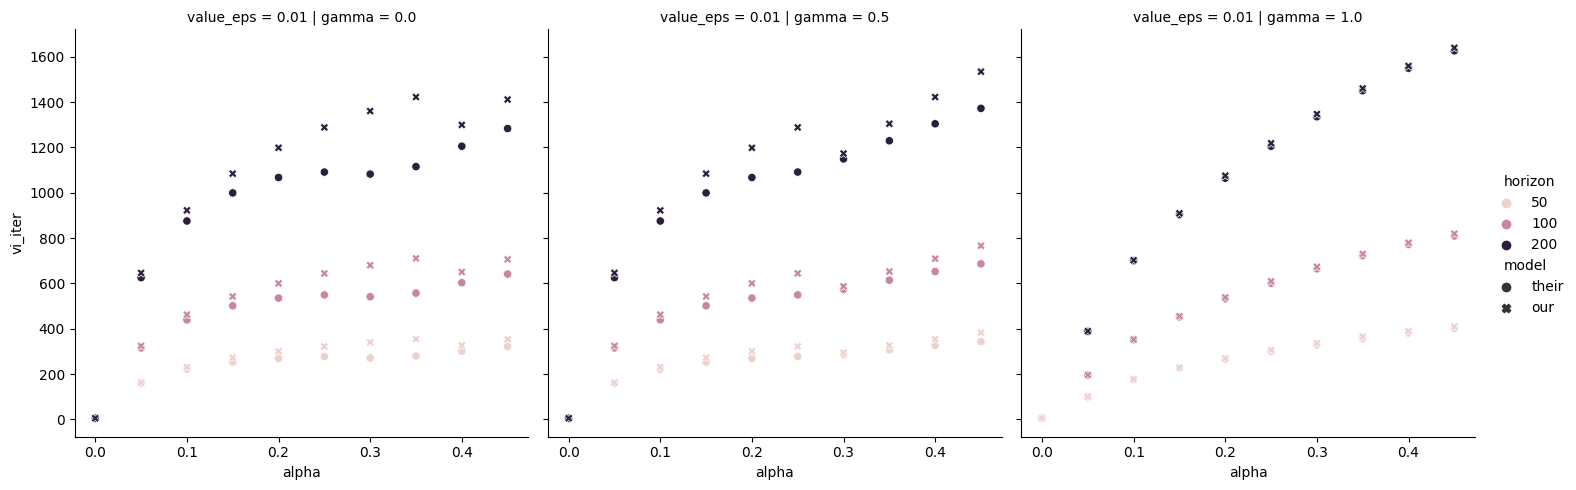

In [5]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="horizon",
    row="value_eps",
    style="model",
)

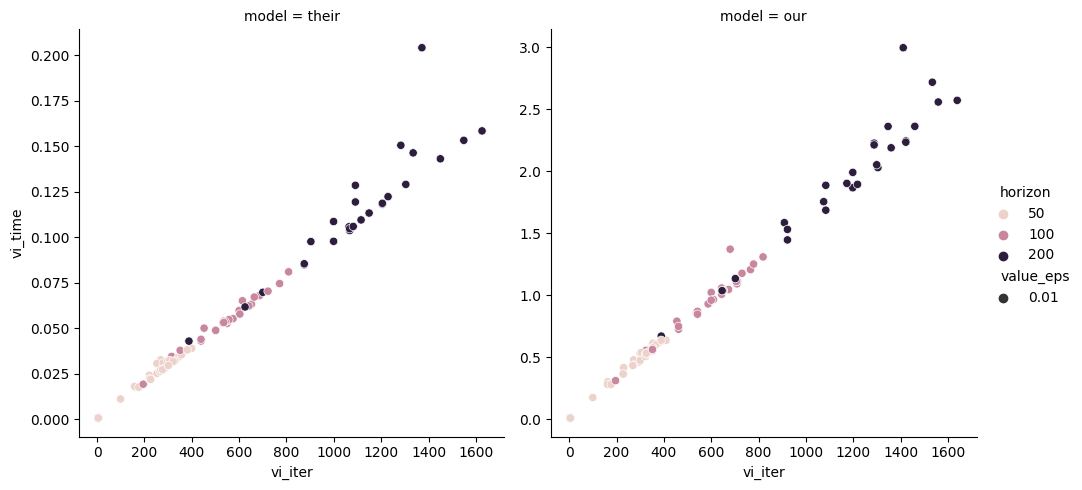

In [6]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="value_eps",
    col="model",
    facet_kws=dict(sharey=False),
)